##### Get the best trajectory
With the functions `get_static_obstacles_vJ()`, `get_dyn_obstacles_vJ()`, `get_reward_points_vJ` (J=1,2) we can generate different dynamic maps

In [1]:
import os
from src.m01_refactored import get_path, plot_rho
from src.map_generators import * 
import numpy as np
import copy

In [6]:
# Set variable to True/False in order to test different maps
use_map_2 = True

if use_map_2 == True:
    d0 = 3
    d1 = 8
    t_max = 15
    get_static_obstacles = get_static_obstacles_v2
    get_dyn_obstacles = get_dyn_obstacles_v2
    get_reward_points = get_reward_points_v2
else:
    d0 = 3
    d1 = 4
    t_max = 11
    get_static_obstacles = get_static_obstacles_v1
    get_dyn_obstacles = get_dyn_obstacles_v1
    get_reward_points = get_reward_points_v1


params = {
    'd0': d0,
    'd1': d1,
    't_max': t_max,
    'alpha': 0.1,
    'gamma': 1,
    'max_iterations': 100000
}

# get obstacles
obstacles_static = get_static_obstacles(d0, d1)
obstacles_all = [copy.deepcopy(obstacles_static) for el in range(t_max+1)]

for t in range(t_max+1):
    obstacles_dynamic = get_dyn_obstacles(t)
    obstacles_all[t].extend(obstacles_dynamic)

# get rewards 
reward_points = get_reward_points(t_max)

result = get_path(params=params,
                  impenetrable_points=obstacles_all,
                  reward_points=reward_points)

tau = 14
tau = 13
tau = 12
tau = 11
tau = 10
tau = 9
tau = 8
tau = 7
tau = 6
tau = 5
tau = 4
tau = 3
tau = 2
tau = 1
tau = 0


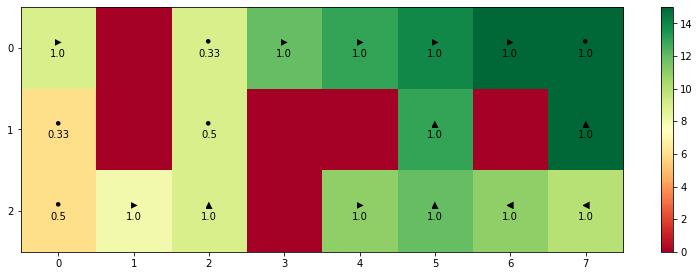

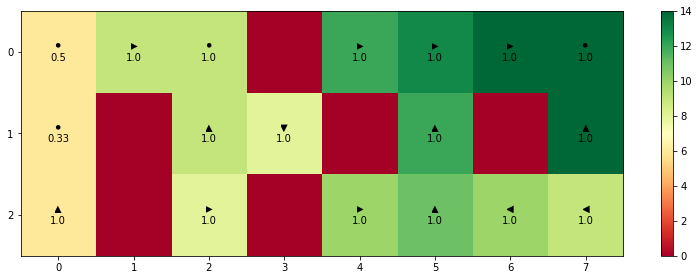

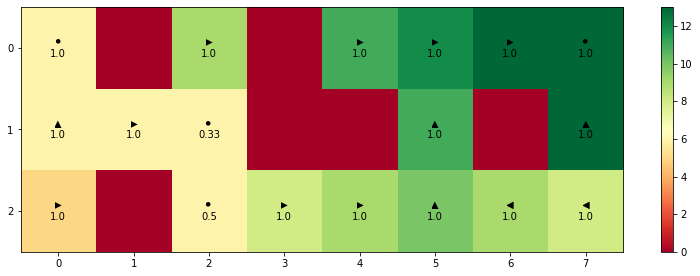

In [5]:
for t in range(3):
    fig = plot_rho(V=result['v_stars'][t], 
                 probabilities=result['rhos'][t], 
                 impenetrable_points=obstacles_all[t], 
                 d0=d0, 
                 d1=d1)

    fig.savefig(f'probs_{t}.png', transparent=True, pad_inches=0, bbox_inches='tight')

##### trajectory explorer

In [7]:
def traj_realization(rhos, t_max, x_init=(2,0), x_final=(0,7)):

    n_steps = 0
    t = 0
    x, x_new = x_init, None
    steps=[x]

    while x_new != x_final and t < t_max:

        move_prob = rhos[t][x]
        move_cumulative_prob = np.cumsum(move_prob)

        rv = np.random.rand()
        mask = rv < move_cumulative_prob
        action = np.argmax(mask)

        if action == 0:
            x_new = x
        elif action == 1:
            x_new = (x[0]-1, x[1])
        elif action == 2:
            x_new = (x[0]+1, x[1])
        elif action == 3:
            x_new = (x[0], x[1]+1)
        else:
            x_new = (x[0], x[1]-1)

        x = x_new
        t += 1
        n_steps += 1
        steps.append(x)

    return n_steps, steps

In [8]:
rhos = result['rhos']

In [9]:
# All generated trajectories are equally long
n_steps_collection = [traj_realization(rhos, t_max, x_init=(2,0), x_final=(0,7)) for _ in range(10000)]
n_steps_collection = map(lambda x: x[0], n_steps_collection)
n_steps_collection = list(n_steps_collection)
set(n_steps_collection)

{10}

In [10]:
# See all unique trajectories
n_steps_collection = [traj_realization(rhos, t_max, x_init=(2,0), x_final=(0,7)) for _ in range(10000)]
n_steps_collection = map(lambda x: str(x[1]), n_steps_collection)
n_steps_collection = list(n_steps_collection)

unique, counts = np.unique(n_steps_collection, return_counts=True)
print(np.asarray((unique, counts)).T)

[['[(2, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7)]'
  '1707']
 ['[(2, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7)]'
  '1669']
 ['[(2, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7)]'
  '790']
 ['[(2, 0), (1, 0), (1, 1), (1, 2), (1, 2), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7)]'
  '860']
 ['[(2, 0), (2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7)]'
  '4974']]
